In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving tesla_2.csv to tesla_2 (2).csv


In [ ]:
df=pd.read_csv('tesla_2.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/1/2019,242.649994,244.509995,231.770004,233.850006,233.850006,8259500
1,8/2/2019,231.350006,236.270004,229.229996,234.339996,234.339996,6100400
2,8/5/2019,229.600006,231.369995,225.779999,228.320007,228.320007,7028300
3,8/6/2019,231.880005,232.500000,225.750000,230.750000,230.750000,5564200
4,8/7/2019,226.500000,233.570007,225.800003,233.419998,233.419998,4776500
...,...,...,...,...,...,...,...
123,1/28/2020,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
124,1/29/2020,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
125,1/30/2020,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
126,1/31/2020,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [ ]:
df.shape

(128, 7)

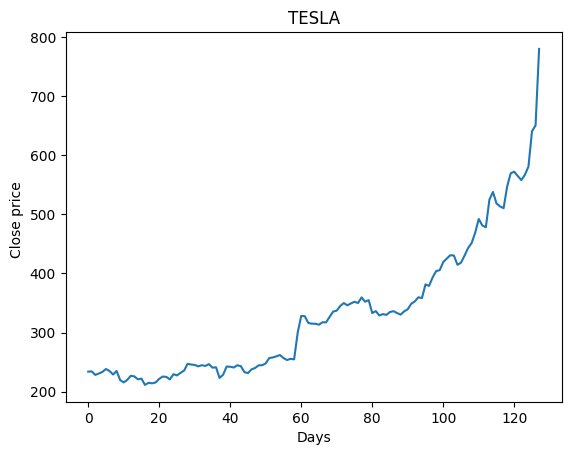

In [ ]:
plt.title("TESLA")
plt.xlabel('Days')
plt.ylabel('Close price ')
plt.plot(df['Close'])
plt.show()


In [ ]:
df=df[['Close']]
df.head(5)

,Close
0,233.850006
1,234.339996
2,228.320007
3,230.750000
4,233.419998


In [ ]:
future_days=25
df['Prediction']=df[['Close']].shift(-future_days)
df

<ipython-input-46-14e46a67c4fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction']=df[['Close']].shift(-future_days)


,Close,Prediction
0,233.850006,227.449997
1,234.339996,231.789993
2,228.320007,235.539993
3,230.750000,247.100006
4,233.419998,245.869995
...,...,...
123,566.900024,NaN
124,580.989990,NaN
125,640.809998,NaN
126,650.570007,NaN


In [ ]:
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[233.850006]
 [234.339996]
 [228.320007]
 [230.75    ]
 [233.419998]
 [238.300003]
 [235.009995]
 [229.009995]
 [235.      ]
 [219.619995]
 [215.639999]
 [219.940002]
 [226.830002]
 [225.860001]
 [220.830002]
 [222.149994]
 [211.399994]
 [215.      ]
 [214.080002]
 [215.589996]
 [221.710007]
 [225.610001]
 [225.009995]
 [220.679993]
 [229.580002]
 [227.449997]
 [231.789993]
 [235.539993]
 [247.100006]
 [245.869995]
 [245.199997]
 [242.809998]
 [244.789993]
 [243.490005]
 [246.600006]
 [240.619995]
 [241.229996]
 [223.210007]
 [228.699997]
 [242.559998]
 [242.130005]
 [240.869995]
 [244.690002]
 [243.130005]
 [233.029999]
 [231.429993]
 [237.720001]
 [240.050003]
 [244.529999]
 [244.740005]
 [247.889999]
 [256.959991]
 [257.890015]
 [259.75    ]
 [261.970001]
 [256.950012]
 [253.5     ]
 [255.580002]
 [254.679993]
 [299.679993]
 [328.130005]
 [327.709991]
 [316.220001]
 [315.01001 ]
 [314.920013]
 [313.309998]
 [317.470001]
 [317.220001]
 [326.579987]
 [335.540009]
 [337.140015]
 [345.

<ipython-input-47-0522a47ccbe7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(df.drop(['Prediction'],1))[:-future_days]


In [ ]:
y=np.array(df['Prediction'])[:-future_days]
print(y)

[227.449997 231.789993 235.539993 247.100006 245.869995 245.199997
 242.809998 244.789993 243.490005 246.600006 240.619995 241.229996
 223.210007 228.699997 242.559998 242.130005 240.869995 244.690002
 243.130005 233.029999 231.429993 237.720001 240.050003 244.529999
 244.740005 247.889999 256.959991 257.890015 259.75     261.970001
 256.950012 253.5      255.580002 254.679993 299.679993 328.130005
 327.709991 316.220001 315.01001  314.920013 313.309998 317.470001
 317.220001 326.579987 335.540009 337.140015 345.089996 349.929993
 346.109985 349.350006 352.170013 349.98999  359.519989 352.220001
 354.829987 333.040009 336.339996 328.920013 331.290009 329.940002
 334.869995 336.200012 333.029999 330.369995 335.890015 339.529999
 348.839996 352.700012 359.679993 358.390015 381.5      378.98999
 393.149994 404.040009 405.589996 419.220001 425.25     430.940002
 430.380005 414.700012 418.329987 430.26001  443.01001  451.540009
 469.059998 492.140015 481.339996 478.149994 524.859985 537.919

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [ ]:
tree=DecisionTreeRegressor().fit(x_train,y_train)
lr=LinearRegression().fit(x_train,y_train)

In [ ]:
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days )
#x_future=np.array(x_future)
x_future

<ipython-input-54-92198533b1fc>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future=df.drop(['Prediction'],1)[:-future_days]


,Close
78,352.220001
79,354.829987
80,333.040009
81,336.339996
82,328.920013
83,331.290009
84,329.940002
85,334.869995
86,336.200012
87,333.029999


In [ ]:
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction=lr.predict(x_future)
print(lr_prediction)
print()

[430.380005 510.5      478.149994 430.26001  443.01001  451.540009
 469.059998 492.140015 481.339996 478.149994 524.859985 537.919983
 430.26001  405.589996 510.5      547.200012 547.200012 558.02002
 558.02002  558.02002  566.900024 566.900024 650.570007 650.570007
 650.570007]

[461.23419578 465.47721142 430.05356651 435.41830656 423.35574996
 427.2086174  425.01393099 433.02854768 435.19073664 430.0372934
 425.71296425 434.68677911 440.60424725 455.73937166 462.01454257
 473.36179443 471.26469627 508.83425703 504.7537709  527.77347994
 545.47721624 547.99700718 570.15510468 579.95798486 589.20813694]



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


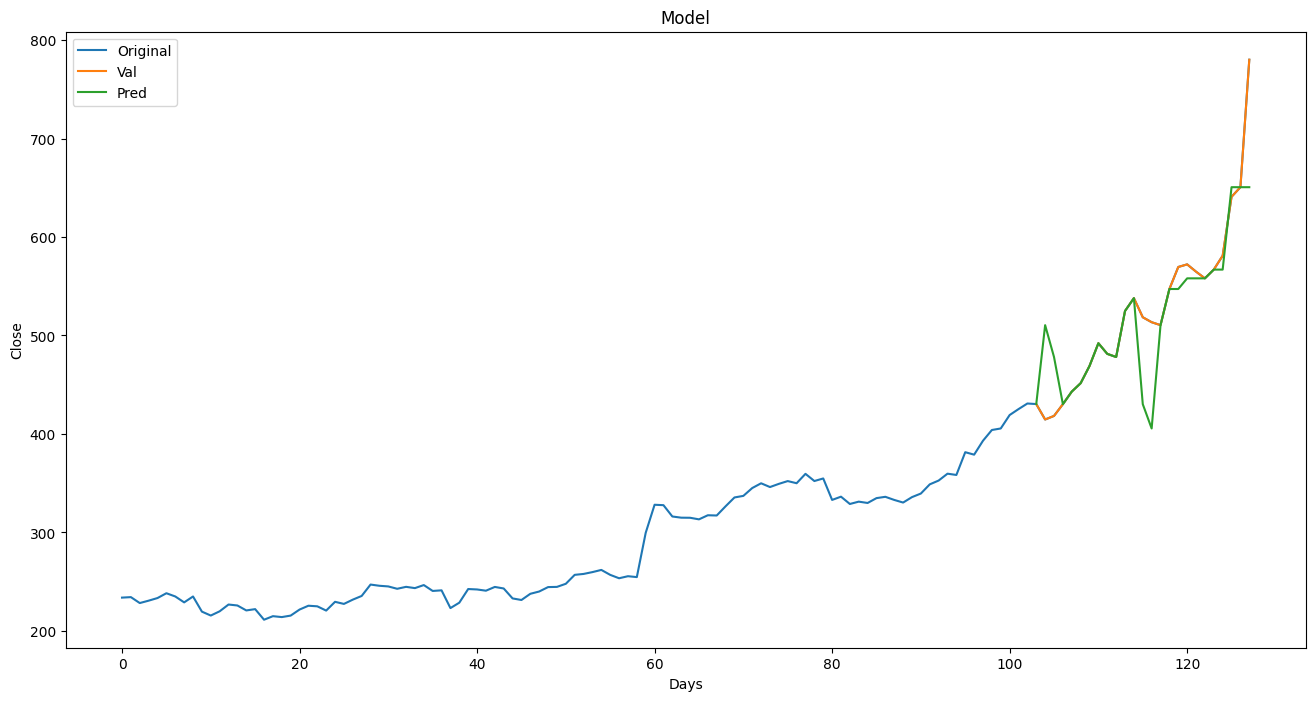

In [ ]:

Predictions=lr_prediction


plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close")
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Val','Pred'])
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.7708244353940334